##### Import Libraries and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

##### Load Dataset

In [2]:
data = load_breast_cancer()

In [3]:
X = data.data
y = data.target

##### Standardize features

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Train-Test-Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Train as SVM(Linear Kernel)

In [6]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [7]:
print("Linear Kernel SVM Accuracy:", linear_svm.score(X_test, y_test))

Linear Kernel SVM Accuracy: 0.956140350877193


##### Train an SVM (RBF Kernel)

In [8]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)

SVC(C=1)

In [9]:
print("RBF Kernel SVM Accuracy:", rbf_svm.score(X_test, y_test))

RBF Kernel SVM Accuracy: 0.9736842105263158


##### Visualize Decision Boundary (with 2D toy dataset)

In [10]:
from sklearn.datasets import make_classification

In [11]:
X_vis, y_vis = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                   n_clusters_per_class=1, n_samples=200, random_state=42)


In [12]:
# Fit RBF SVM
svm_vis = SVC(kernel='rbf', C=1, gamma=0.5)
svm_vis.fit(X_vis, y_vis)

SVC(C=1, gamma=0.5)

In [13]:
# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_vis[:,0].min()-1, X_vis[:,0].max()+1, 200),
                     np.linspace(X_vis[:,1].min()-1, X_vis[:,1].max()+1, 200))


In [14]:
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

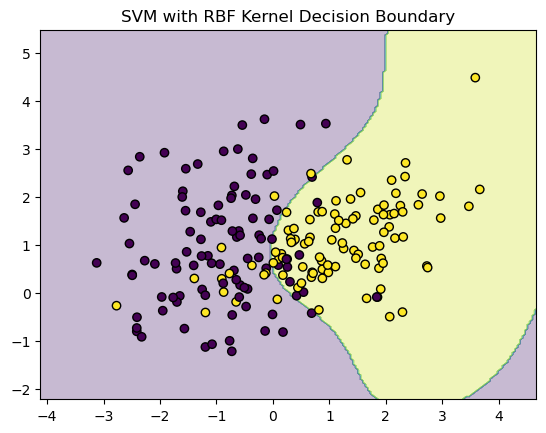

In [16]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, edgecolors='k')
plt.title("SVM with RBF Kernel Decision Boundary")
plt.show()

##### Hyperparameter Tuning (C and Gamma)

In [17]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf']
}

In [18]:
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1],
                         'kernel': ['rbf']})

In [20]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9736263736263737


##### Cross Validation

In [21]:
scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X, y, cv=5)

In [22]:
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736376339077782
